<a href="https://colab.research.google.com/github/sravanibandreddy/deep-learning/blob/main/dl_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training with optimizer: adam


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8726 - loss: 0.4403 - val_accuracy: 0.9712 - val_loss: 0.0990
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9732 - loss: 0.0895 - val_accuracy: 0.9778 - val_loss: 0.0760
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9839 - loss: 0.0532 - val_accuracy: 0.9780 - val_loss: 0.0767

Training with optimizer: sgd
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7665 - loss: 0.8268 - val_accuracy: 0.9445 - val_loss: 0.1953
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9383 - loss: 0.2151 - val_accuracy: 0.9630 - val_loss: 0.1398
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9540 - loss: 0.1561 - val_accuracy: 0.9712 - val_loss: 0.1107

Training with optimizer: rmsprop
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8626 - loss: 0.4473 - val_accuracy: 0.9723 - val_loss: 0.0905
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 

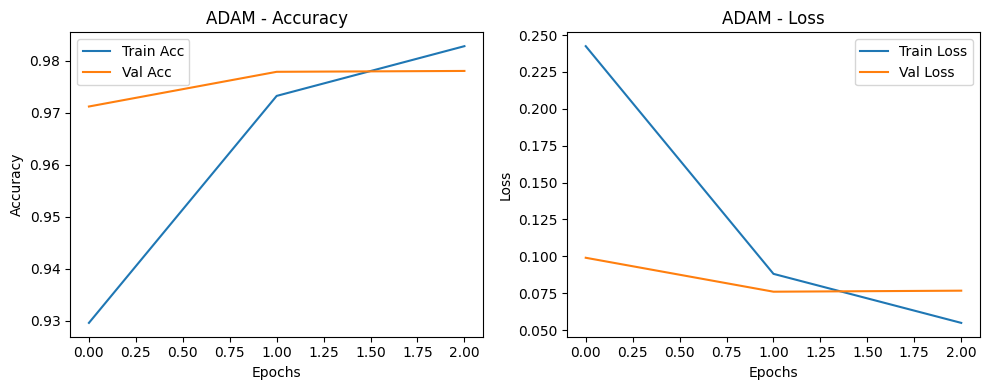

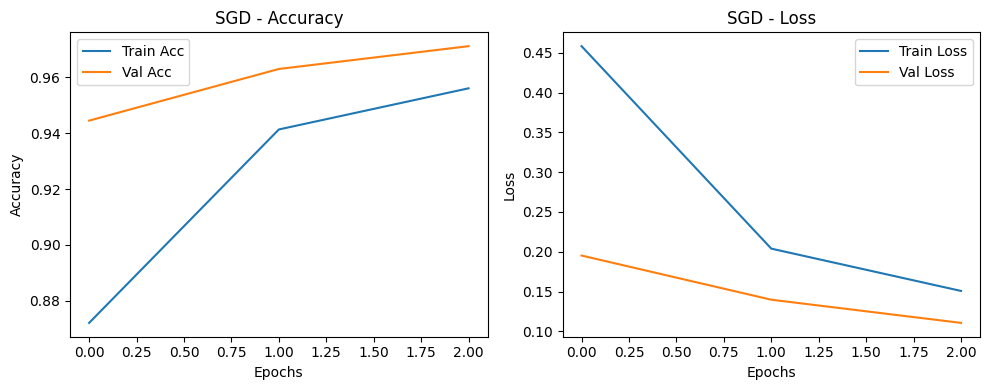

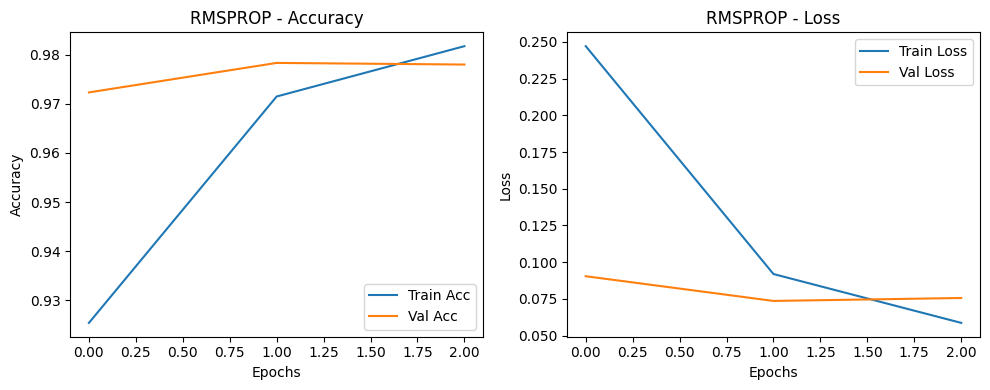

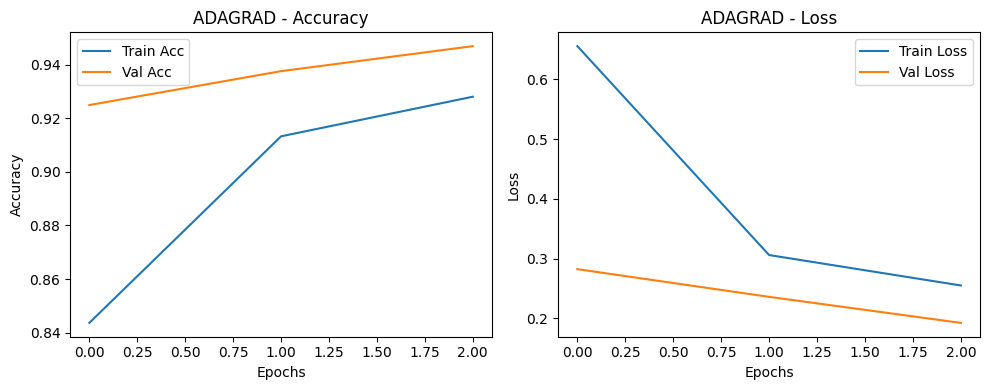

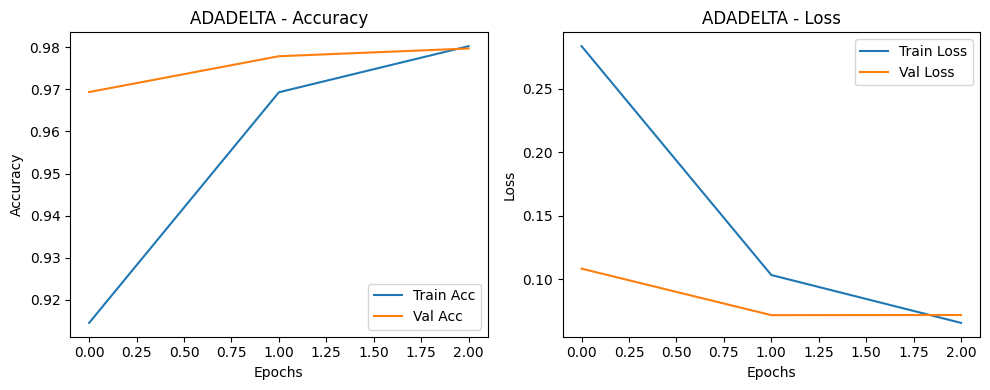

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# 2. Load & normalize data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Form a dictionary of optimizers (removed nadam, ftrl)
optimizer_dict = {
    "adam": optimizers.Adam(learning_rate=0.001),
    "sgd": optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "rmsprop": optimizers.RMSprop(learning_rate=0.001),
    "adagrad": optimizers.Adagrad(learning_rate=0.01),
    "adadelta": optimizers.Adadelta(learning_rate=1.0)
}

# 4. Function to build MLP model
def build_mlp():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# 5. Train & store results
results = {}
histories = {}

for opt_name, opt in optimizer_dict.items():
    print(f"\nTraining with optimizer: {opt_name}")
    model = build_mlp()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        epochs=3, batch_size=128,
        validation_split=0.1, verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[opt_name] = {"accuracy": test_acc, "loss": test_loss}
    histories[opt_name] = history.history

# 6. Display final test results
print("\nFinal Test Results:")
for opt_name, res in results.items():
    print(f"{opt_name}: Accuracy = {res['accuracy']:.4f}, Loss = {res['loss']:.4f}")

# 7. Plot accuracy & loss for each optimizer
for opt_name, history in histories.items():
    plt.figure(figsize=(10,4))

# Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Acc')
    plt.plot(history['val_accuracy'], label='Val Acc')
    plt.title(f"{opt_name.upper()} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

# Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f"{opt_name.upper()} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()
